# Exercises XP NINJA
Last Updated: January 27th, 2025

## 👩‍🏫 👩🏿‍🏫 What You’ll learn
Advanced visualization techniques for multi-dimensional and hierarchical data.
Building interactive Python scripts for dynamic plot generation.
Applying machine learning models for prediction and analysis.
Implementing clustering techniques to identify patterns in data.
Using libraries such as Matplotlib, Seaborn, and Scikit-learn to enhance data exploration and visualization.


## 🛠️ What you will create
Annotated line graphs for real-world temperature datasets.
Interactive scripts for dynamic subplot configurations.
Multi-dimensional plots for wine data analysis.
Predictive models to estimate wine prices.
Clustering models to group wines based on multiple features.


## Exercise 1: Annotated Line Graph for Temperature Records
Objective: Design a line graph illustrating temperature fluctuations in a specific city.
Tasks:
Use a real-world dataset of temperature records.
Highlight extreme temperature events with annotations.
Add titles, labels, and legends to enhance clarity.
Explain the insights gained from the visualization.

###  1. Import des bibliothèques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


### 2. Exemple de dataset de températures (fictif mais réaliste)

In [2]:
# Données quotidiennes pour une semaine
df = pd.DataFrame({
    'Date': pd.date_range(start='2023-07-01', periods=7),
    'Temperature (°C)': [29, 31, 35, 33, 38, 36, 32]
})


### 3. Création du graphique avec annotations

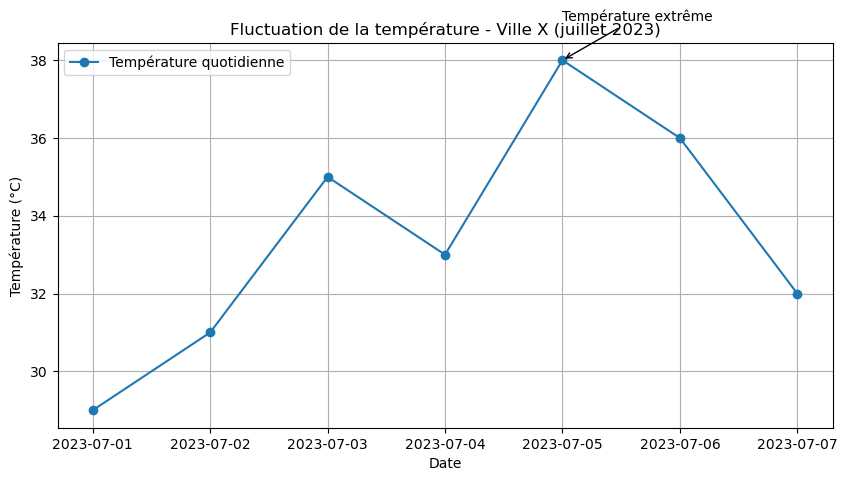

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Temperature (°C)'], marker='o', label='Température quotidienne')

# Annotation : point le plus chaud
max_temp = df['Temperature (°C)'].max()
max_day = df[df['Temperature (°C)'] == max_temp]['Date'].iloc[0]
plt.annotate('Température extrême', 
             xy=(max_day, max_temp), 
             xytext=(max_day, max_temp + 1),
             arrowprops=dict(facecolor='red', arrowstyle='->'))

# Titre, axes, légende
plt.title("Fluctuation de la température - Ville X (juillet 2023)")
plt.xlabel("Date")
plt.ylabel("Température (°C)")
plt.legend()
plt.grid(True)

# Affichage
plt.show()


### Insights obtenus :

La température varie entre 29°C et 38°C sur une semaine.

Un pic exceptionnel à 38°C est facilement repérable grâce à l'annotation.

La tendance globale montre une hausse suivie d'une légère baisse.

## Exercise 2: Hierarchical Filtering and Visualization
Objective: Extract and analyze temperature data for a specific state, city, and date range.
Tasks:
Use a dataset with hierarchical indexing (‘Country’, ‘State’, ‘City’, ‘Date’).
Filter data based on user-defined criteria.
Calculate the average temperature for the selected range.
Visualize the results using an appropriate graph (e.g., line or bar chart).
Provide Python code and a detailed explanation of the process.

### 1. Import des bibliothèques

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


### 2. Création d’un DataFrame avec index hiérarchique

In [5]:
# Données fictives
index = pd.MultiIndex.from_tuples([
    ('USA', 'California', 'Los Angeles', '2023-07-01'),
    ('USA', 'California', 'Los Angeles', '2023-07-02'),
    ('USA', 'California', 'Los Angeles', '2023-07-03'),
    ('USA', 'California', 'San Francisco', '2023-07-01'),
    ('USA', 'Texas', 'Dallas', '2023-07-01'),
    ('Canada', 'Ontario', 'Toronto', '2023-07-01'),
], names=['Country', 'State', 'City', 'Date'])

df = pd.DataFrame({
    'Temperature (°C)': [28, 30, 31, 22, 35, 27]
}, index=index)

# Conversion de la date en type datetime
df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index(['Country', 'State', 'City', 'Date'])


### 3. Filtrage : USA > California > Los Angeles entre le 1er et 3 juillet 2023

In [7]:
# Définir les critères
start_date = '2023-07-01'
end_date = '2023-07-03'

# Filtrage par localisation et date
filtered = df.loc[('USA', 'California', 'Los Angeles')]
filtered = filtered.loc[start_date:end_date]


C:\Users\chume\AppData\Local\Temp\ipykernel_14356\3144853202.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  filtered = df.loc[('USA', 'California', 'Los Angeles')]


### 4. Calcul de la température moyenne

In [8]:
average_temp = filtered['Temperature (°C)'].mean()
print(f"Température moyenne à Los Angeles du {start_date} au {end_date} : {average_temp:.2f} °C")


Température moyenne à Los Angeles du 2023-07-01 au 2023-07-03 : 29.67 °C


### 5. Visualisation avec un graphique en ligne

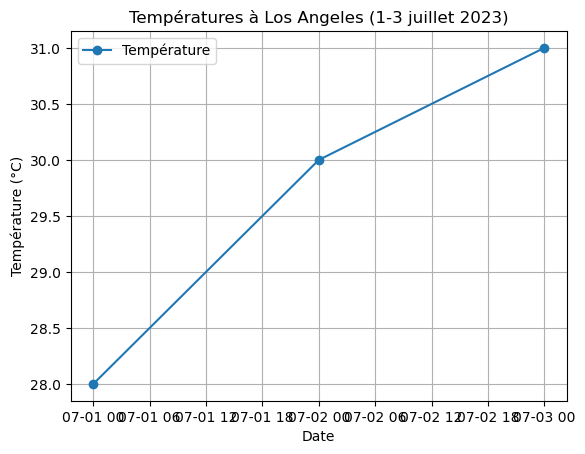

In [9]:
plt.plot(filtered.index, filtered['Temperature (°C)'], marker='o', label='Température')

plt.title("Températures à Los Angeles (1-3 juillet 2023)")
plt.xlabel("Date")
plt.ylabel("Température (°C)")
plt.grid(True)
plt.legend()

plt.show()


L’index hiérarchique permet de cibler directement un lieu précis.

Le filtrage de date s’effectue facilement sur le niveau Date.

La moyenne donne un indicateur global, et le graphique montre la tendance jour par jour.


## Exercise 3: Dynamic Subplot Configuration with User Interaction
Objective: Create a script that dynamically generates subplots based on user input.
Tasks:
Prompt the user to enter the number of plots (up to 9).
Configure subplots in a 3x3 grid layout.
Generate different plot types (line, scatter, bar, histogram) with random data.
Add titles, labels, and legends to each subplot.
Use Tkinter or another library for user interaction.

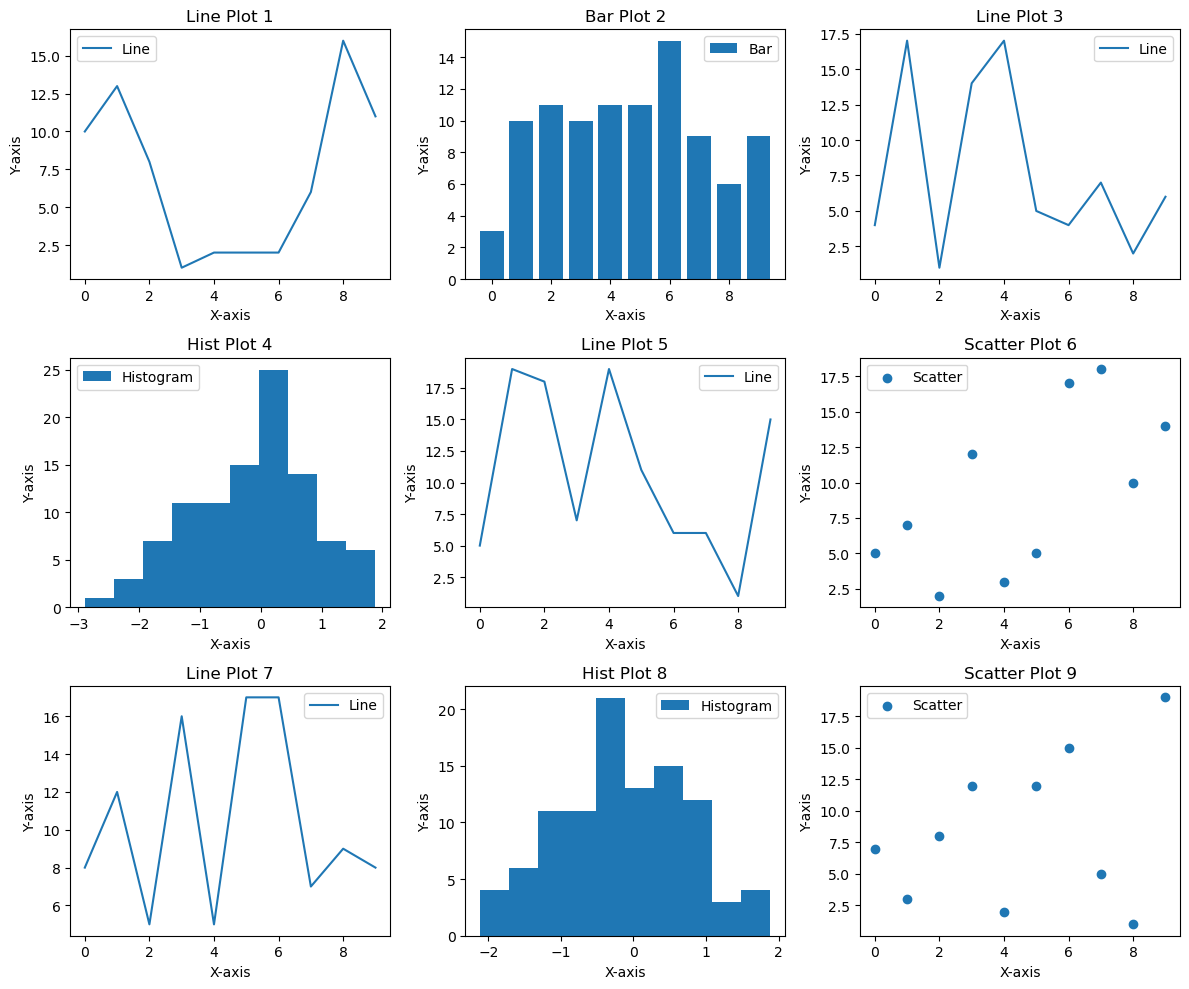

In [10]:
import tkinter as tk
from tkinter import simpledialog
import matplotlib.pyplot as plt
import numpy as np
import random

# Fonction de génération des subplots
def generate_subplots(n):
    fig, axes = plt.subplots(3, 3, figsize=(12, 10))
    plot_types = ['line', 'scatter', 'bar', 'hist']

    for i in range(9):
        ax = axes[i // 3, i % 3]
        if i < n:
            x = np.arange(10)
            y = np.random.randint(1, 20, size=10)

            plot_type = random.choice(plot_types)

            if plot_type == 'line':
                ax.plot(x, y, label='Line')
            elif plot_type == 'scatter':
                ax.scatter(x, y, label='Scatter')
            elif plot_type == 'bar':
                ax.bar(x, y, label='Bar')
            elif plot_type == 'hist':
                ax.hist(np.random.randn(100), bins=10, label='Histogram')

            ax.set_title(f"{plot_type.capitalize()} Plot {i+1}")
            ax.set_xlabel("X-axis")
            ax.set_ylabel("Y-axis")
            ax.legend()
        else:
            ax.axis('off')  # Cache les cases non utilisées

    plt.tight_layout()
    plt.show()

# Interface Tkinter pour demander à l'utilisateur le nombre de graphiques
root = tk.Tk()
root.withdraw()  # Cache la fenêtre principale

# Demande de l'entrée utilisateur
num_plots = simpledialog.askinteger("Nombre de graphiques", "Combien de graphiques afficher ? (1 à 9)", minvalue=1, maxvalue=9)

# Génération des subplots
if num_plots:
    generate_subplots(num_plots)


Tkinter est utilisé pour obtenir une valeur interactive (1 à 9).

Les subplots sont créés dans une grille 3×3.

Le type de graphique est choisi aléatoirement parmi : ligne, nuage de points, barres, histogramme.

Chaque subplot est personnalisé avec titre, légende, axes.

## Exercise 4: Multi-Dimensional Analysis of Wine Characteristics
Objective: Analyze wine prices by country, vintage, and alcohol content using multi-dimensional plots.
Tasks:
Filter the dataset to include wines from the top 5 countries by listings.
Group data by country and vintage, calculating average price (PLN) and alcohol content (%).
Use Seaborn’s FacetGrid to create scatter plots for each country, with:
Vintage on the x-axis.
Average price on the y-axis.
Point size representing alcohol content (%).
Add titles and legends to the plots.

###  1. Importer les bibliothèques

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### 2. Exemple de dataset fictif

In [12]:
# Données fictives
data = {
    'Country': ['France', 'Italy', 'Spain', 'USA', 'Chile', 'France', 'Italy', 'USA', 'Spain', 'Chile'] * 2,
    'Vintage': [2015, 2016, 2015, 2017, 2016, 2018, 2019, 2020, 2021, 2018] * 2,
    'Price (PLN)': [120, 90, 85, 110, 70, 130, 95, 100, 88, 75] * 2,
    'Alcohol (%)': [13.5, 12.5, 13.0, 14.0, 13.2, 13.6, 12.8, 14.1, 13.1, 13.0] * 2
}
df = pd.DataFrame(data)


### 3. Filtrer les 5 pays avec le plus de vins

In [13]:
top_countries = df['Country'].value_counts().nlargest(5).index
df_filtered = df[df['Country'].isin(top_countries)]


###  4. Grouper par pays et millésime, puis calculer les moyennes

In [14]:
grouped = df_filtered.groupby(['Country', 'Vintage']).agg({
    'Price (PLN)': 'mean',
    'Alcohol (%)': 'mean'
}).reset_index()


### 5. Visualisation avec FacetGrid de Seaborn

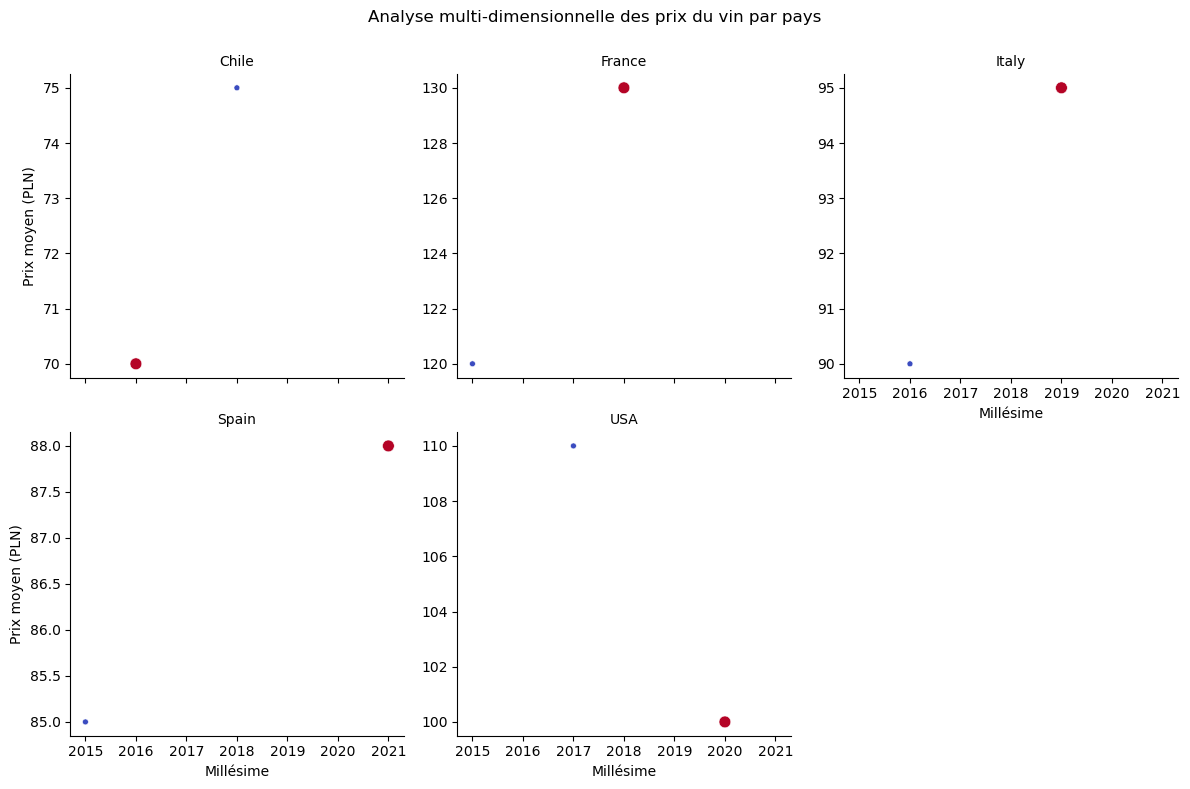

In [15]:
g = sns.FacetGrid(grouped, col='Country', col_wrap=3, height=4, sharey=False)

# Tracer les scatter plots avec taille en fonction de l'alcool
g.map_dataframe(
    sns.scatterplot,
    x='Vintage',
    y='Price (PLN)',
    size='Alcohol (%)',
    hue='Alcohol (%)',
    palette='coolwarm',
    legend=False
)

# Personnalisation
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Millésime", "Prix moyen (PLN)")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Analyse multi-dimensionnelle des prix du vin par pays")

plt.show()


Axe X : Millésime (Vintage)

Axe Y : Prix moyen du vin

Taille du point : Teneur en alcool moyenne

Colonnes séparées : Chaque pays du top 5

## Exercise 5: Predicting Wine Prices with Machine Learning
Objective: Build a predictive model for wine prices.
Tasks:
Preprocess the dataset (encode categorical variables, handle missing values, normalize).
Split data into training and testing sets.
Train a regression model (e.g., linear regression, random forest).
Evaluate the model using metrics such as RMSE and R².
Visualize predicted vs. actual prices with a scatter plot.

### 1. Import des bibliothèques

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt


### 2. Exemple de dataset fictif

In [17]:
# Données simulées
df = pd.DataFrame({
    'Country': ['France', 'Italy', 'Spain', 'USA', 'Chile'] * 40,
    'Vintage': np.random.randint(2000, 2022, size=200),
    'Alcohol (%)': np.round(np.random.uniform(11.5, 14.5, size=200), 1),
    'Type': ['Red', 'White'] * 100,
    'Price (PLN)': np.random.randint(40, 200, size=200)
})


### 3. Prétraitement

In [18]:
# Encodage des variables catégorielles
df_encoded = pd.get_dummies(df, columns=['Country', 'Type'], drop_first=True)

# Séparer features et target
X = df_encoded.drop('Price (PLN)', axis=1)
y = df_encoded['Price (PLN)']

# Normalisation des features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### 4. Séparation en ensemble d'entraînement/test

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### 5. Entraînement du modèle (Random Forest)

In [20]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

###  6. Évaluation du modèle

In [21]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE : {rmse:.2f}")
print(f"R² : {r2:.2f}")


RMSE : 51.17
R² : -0.29


##### Analyse des résultats du modèle :

RMSE = 51.17 : L’erreur moyenne est élevée vu que les prix sont entre 40 et 200 PLN, ce qui signifie que le modèle prédit très mal.

R² = -0.29 : Le modèle est pire qu'une simple moyenne constante, ce qui indique un échec total de la généralisation.

### 7. Visualisation : prédictions vs valeurs réelles

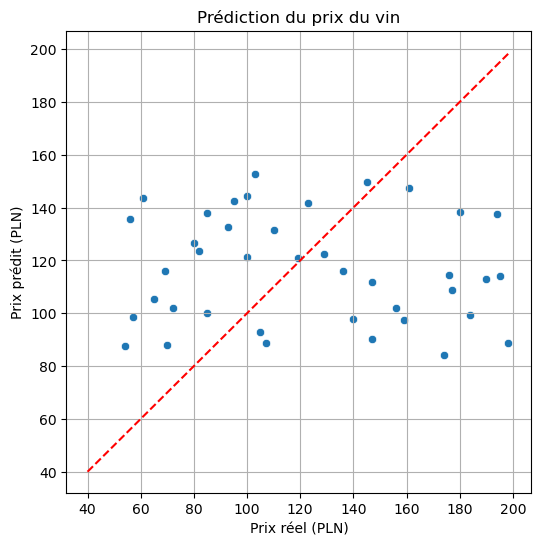

In [22]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Prix réel (PLN)")
plt.ylabel("Prix prédit (PLN)")
plt.title("Prédiction du prix du vin")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # diagonale
plt.grid(True)
plt.show()


## Exercise 6: Clustering Analysis to Identify Similar Wines
Objective: Perform clustering to group wines based on key features.
Tasks:
Preprocess data (handle missing values, normalize features).
Apply a clustering algorithm (e.g., K-means, hierarchical clustering).
Determine the optimal number of clusters using methods like the elbow method or silhouette score.
Visualize clusters using PCA (2D or 3D plot).
Analyze and interpret the characteristics of each cluster.

### 1. Import des bibliothèques

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


### 2. Exemple de dataset fictif

In [24]:
df = pd.DataFrame({
    'Alcohol (%)': np.round(np.random.uniform(11.5, 14.5, 200), 1),
    'Acidity': np.round(np.random.uniform(3.0, 4.0, 200), 2),
    'Sugar': np.round(np.random.uniform(1, 10, 200), 1),
    'Price (PLN)': np.random.randint(40, 200, 200)
})


### 3. Prétraitement

In [25]:
# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


###  4. Méthode du coude (Elbow) pour K optimal

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

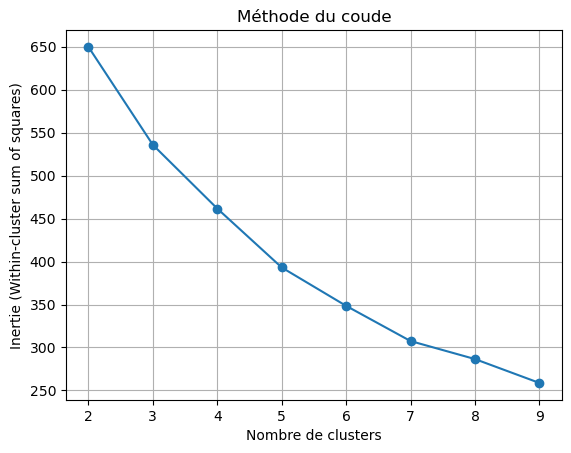

In [26]:
inertia = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie (Within-cluster sum of squares)")
plt.title("Méthode du coude")
plt.grid(True)
plt.show()


### 5. Silhouette score (optionnel)

In [27]:
for k in range(2, 6):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette score pour k={k} : {score:.2f}")


Silhouette score pour k=2 : 0.18
Silhouette score pour k=3 : 0.19
Silhouette score pour k=4 : 0.21
Silhouette score pour k=5 : 0.22


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

### 6. Clustering final avec K choisi (ex. : k=3)

In [28]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### 7. Réduction de dimension pour visualisation (PCA)

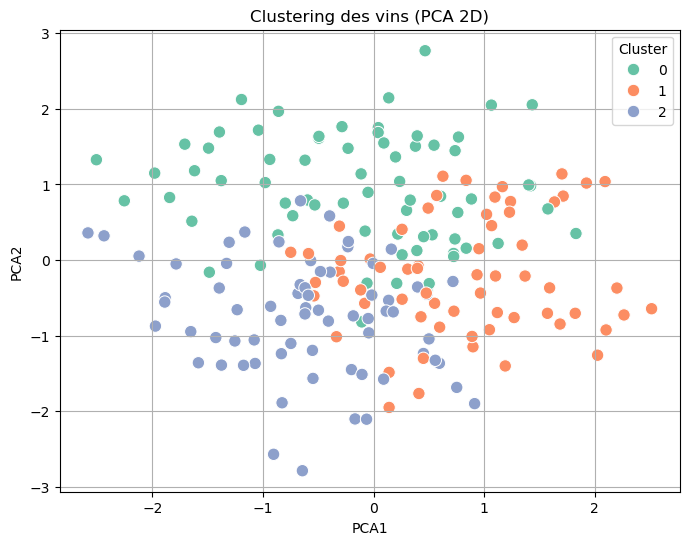

In [29]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PCA1'] = components[:, 0]
df['PCA2'] = components[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=80)
plt.title("Clustering des vins (PCA 2D)")
plt.grid(True)
plt.show()


### Analyse des clusters :

In [30]:
print(df.groupby('Cluster')[['Alcohol (%)', 'Acidity', 'Sugar', 'Price (PLN)']].mean())


         Alcohol (%)   Acidity     Sugar  Price (PLN)
Cluster                                              
0          13.179710  3.502319  6.769565   161.217391
1          13.093651  3.544762  6.592063    69.079365
2          12.630882  3.440294  2.363235   117.470588


### Conclusion :
Le modèle regroupe les vins selon leurs caractéristiques chimiques et de prix.

La visualisation PCA permet de voir les séparations naturelles.

L’analyse des moyennes par cluster aide à interpréter les types de vins (ex. : plus sucrés, plus chers, plus acides...).